In [47]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('cardio_train.csv', sep=';')
print(data.head())

   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  


In [ ]:
# Age | Objective Feature | age | int (days)
# Height | Objective Feature | height | int (cm) |
# Weight | Objective Feature | weight | float (kg) |
# Gender | Objective Feature | gender | categorical code |
# Systolic blood pressure | Examination Feature | ap_hi | int |
# Diastolic blood pressure | Examination Feature | ap_lo | int |

# Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
# Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |

# Smoking | Subjective Feature | smoke | binary |
# Alcohol intake | Subjective Feature | alco | binary |
# Physical activity | Subjective Feature | active | binary |
# Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

In [3]:
data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [5]:
# Удаление выбросов в столбцах нижнего и верхнего давления 
data = data[data['ap_hi'] < 250] 
data = data[data['ap_lo'] > 30] 
print(data.shape)

(69908, 13)


In [6]:
print(data.head())

   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  


In [7]:
pd.isnull(data) # проверяем наличие пропущенных значений

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,False,False,False,False,False,False,False,False,False,False,False,False,False
69996,False,False,False,False,False,False,False,False,False,False,False,False,False
69997,False,False,False,False,False,False,False,False,False,False,False,False,False
69998,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
data.cardio.value_counts()

0    34978
1    34930
Name: cardio, dtype: int64

In [9]:
data.to_csv('cardio_train_1.csv', index=False)

In [10]:
#  Метод replace не работает
# data['cholesterol'].replace(['1', '2 ', '3'],
#                         [0, 1, 1], inplace=True)
# print(data)

#  Метод 2: использование get_dummies()
# вызывается метод get_dummies() и задается имя параметра столбца. Этот метод вернет столбцы фиктивной переменной. 
# В этом случае у нас есть 3 типа категориальных переменных, поэтому он вернул три столбца.
# Следующий шаг - объединить столбцы данных. В pandas есть метод concat(),который можно вызвать для объединения двух фреймов данных. 

# Методу предоставляются имена двух фреймов данных и оси, это дает объединенный фрейм данных.
# Отбрасываем исходный столбец "cholesterol", потому что есть столбец фиктивной переменной, 

# После отбрасывания столбцов получается нужный фрейм данных
cont_cols = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
ord_cols = ['cholesterol', 'gluc']

for col in ord_cols:
    dummies = pd.get_dummies(data[col])
    dummies.columns = ['{0}_{1}'.format(col, ind) for ind in dummies.columns]
    data = pd.concat([data, dummies], axis=1)
    
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,0,0,1,1,0,0
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0,0,1,1,0,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1,0,0,1,0,0
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,1,0,0,1,0,0


In [11]:
data['gender'] -= 1  # значения пол переводим в 1 и 0
data['age'] //= 356  # значения возраста из дней переводятся в года 
data = data.drop(labels=['cholesterol', 'gluc', 'id'], axis=1)
data.head()

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3
0,51,1,168,62.0,110,80,0,0,1,0,1,0,0,1,0,0
1,56,0,156,85.0,140,90,0,0,1,1,0,0,1,1,0,0
2,52,0,165,64.0,130,70,0,0,0,1,0,0,1,1,0,0
3,49,1,169,82.0,150,100,0,0,1,1,1,0,0,1,0,0
4,49,0,156,56.0,100,60,0,0,0,0,1,0,0,1,0,0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69908 entries, 0 to 69999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            69908 non-null  int64  
 1   gender         69908 non-null  int64  
 2   height         69908 non-null  int64  
 3   weight         69908 non-null  float64
 4   ap_hi          69908 non-null  int64  
 5   ap_lo          69908 non-null  int64  
 6   smoke          69908 non-null  int64  
 7   alco           69908 non-null  int64  
 8   active         69908 non-null  int64  
 9   cardio         69908 non-null  int64  
 10  cholesterol_1  69908 non-null  uint8  
 11  cholesterol_2  69908 non-null  uint8  
 12  cholesterol_3  69908 non-null  uint8  
 13  gluc_1         69908 non-null  uint8  
 14  gluc_2         69908 non-null  uint8  
 15  gluc_3         69908 non-null  uint8  
dtypes: float64(1), int64(9), uint8(6)
memory usage: 6.3 MB


In [13]:
# save un-normalized data
data.to_csv('preprocessed_data.csv', index=False)

In [ ]:
# Разведочный анализ данных

In [15]:
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.1 MB 5.5 MB/s 


In [16]:
import sweetviz as sv

In [17]:
data_df = pd.read_csv('preprocessed_data.csv')
data_df

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3
0,51,1,168,62.0,110,80,0,0,1,0,1,0,0,1,0,0
1,56,0,156,85.0,140,90,0,0,1,1,0,0,1,1,0,0
2,52,0,165,64.0,130,70,0,0,0,1,0,0,1,1,0,0
3,49,1,169,82.0,150,100,0,0,1,1,1,0,0,1,0,0
4,49,0,156,56.0,100,60,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69903,54,1,168,76.0,120,80,1,0,1,0,1,0,0,1,0,0
69904,63,0,158,126.0,140,90,0,0,1,1,0,1,0,0,1,0
69905,53,1,183,105.0,180,90,0,1,0,1,0,0,1,1,0,0
69906,63,0,163,72.0,135,80,0,0,0,1,1,0,0,0,1,0


In [18]:
report = sv.analyze([data, "Cardio_report"])

                                             |          | [  0%]   00:00 -> (? left)

In [19]:
report.show_html('cardio_report.html')

Report cardio_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
# Одномерный анализ

In [21]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
import seaborn as sns

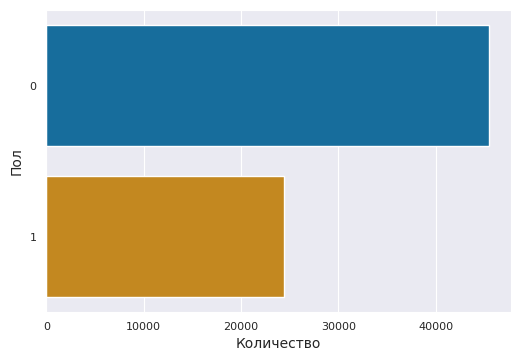

In [23]:
# Соотношение мужчин и женщин в наборе данных
sns.set_style('darkgrid')
sns.countplot(y='gender',data=data_df,palette='colorblind')
plt.xlabel('Количество')
plt.ylabel('Пол')
plt.show()

In [ ]:
# Двумерный анализ. Eсть ли какая-либо корреляция (зависимость) 
# между отдельными столбцами, которые нам необходимо учитывать. Строим диаграмму рассеяния

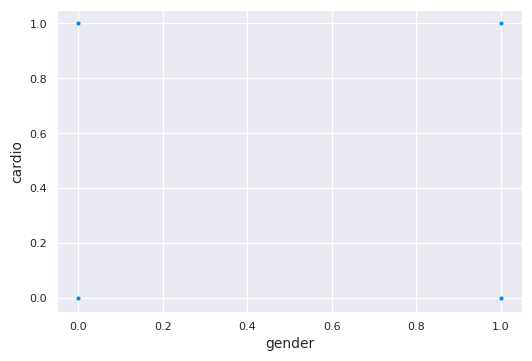

In [24]:
data_df = pd.read_csv('preprocessed_data.csv')
sns.scatterplot(data=data_df, x="gender", y="cardio") # Диаграмма рассеяния

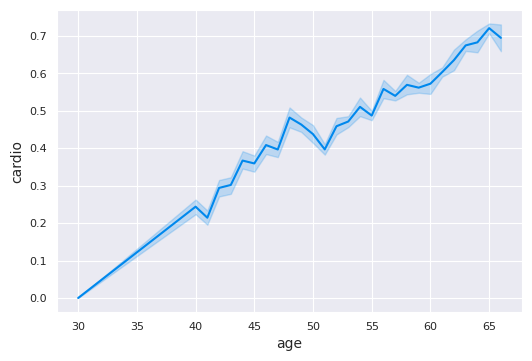

In [25]:
sns.lineplot(data=data_df, x="age", y="cardio") # Линейный график

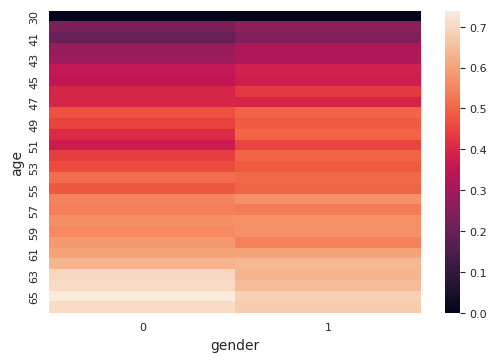

In [26]:
data_df = pd.read_csv('preprocessed_data.csv') # тепловая карта,  как несколько переменных влияют на наличие ССЗ
pivot = data_df.pivot_table(
    index=["age"],
    columns=["gender"],
    values="cardio",
    aggfunc=np.average)
sns.heatmap(pivot)

In [27]:
# строим корреляционную матрицу
df = pd.read_csv('cardio_train.csv', sep=';')
numeric_col = ['age','ap_hi','ap_lo','active'] 
corr_matrix = df.loc[:,numeric_col].corr()
print(corr_matrix)

             age     ap_hi     ap_lo    active
age     1.000000  0.020764  0.017647 -0.009927
ap_hi   0.020764  1.000000  0.016086 -0.000033
ap_lo   0.017647  0.016086  1.000000  0.004780
active -0.009927 -0.000033  0.004780  1.000000


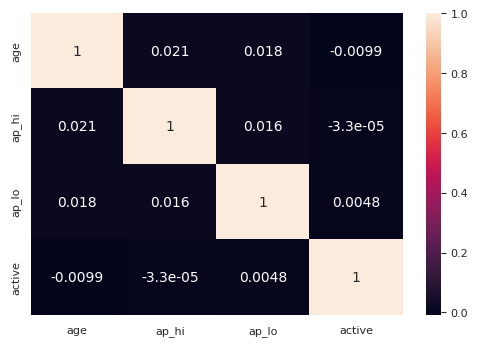

In [28]:
sns.heatmap(corr_matrix, annot=True)  # тепловая карта,  как несколько переменных влияют на наличие ССЗ

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
# Нормализация. Проводим нормализацию всех колонок датасета с помощью MinMaxScaler
df = pd.read_csv('preprocessed_data.csv')
x = df.values
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_minMaxScaled = pd.DataFrame(x_scaled)

In [ ]:
# ОБУЧЕНИЕ НА РАЗМЕЧЕННЫХ ДАННЫХ

In [48]:
data = pd.read_csv('cardio_train.csv', sep=';')
print(data.head())

   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  


In [49]:
df.head(4)

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3
0,51,1,168,62.0,110,80,0,0,1,0,1,0,0,1,0,0
1,56,0,156,85.0,140,90,0,0,1,1,0,0,1,1,0,0
2,52,0,165,64.0,130,70,0,0,0,1,0,0,1,1,0,0
3,49,1,169,82.0,150,100,0,0,1,1,1,0,0,1,0,0


In [50]:
# Выбираем из датасета данные на которых будем обучать и данные которые будем предсказывать
y_df = df['cardio'] # создаем целевую переменную у для этого берем какой то столбец
x_df = df.iloc[0:, 1:16]  # для того, чтобы назначить вторую переменную, воспользуемся методом iloc. 

In [51]:
# Преобразовываем в массив numpy
y = np.array(y_df)
x = np.array(x_df)
print(x)

[[  1. 168.  62. ...   1.   0.   0.]
 [  0. 156.  85. ...   1.   0.   0.]
 [  0. 165.  64. ...   1.   0.   0.]
 ...
 [  1. 183. 105. ...   1.   0.   0.]
 [  0. 163.  72. ...   0.   1.   0.]
 [  0. 170.  72. ...   1.   0.   0.]]


In [52]:
# Делим выборку на обучающую и тестирующую 
X_train, X_test,y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [53]:
# Теперь рассмотрим классификатор и воспользуемся поиском по сетке
# # 1. Чтобы настроить дерево решений DecisionTreeClassifier, нам нужно перебрать параметры:
np.random.seed(42)

param_grid = {'max_features': ['auto', 'sqrt', 'log2'], # max_features - макс кол-во признаков
              'ccp_alpha': [0.1, .01, .001], # отвечает за внутреннюю подстройку параметров
              'max_depth': [2, 3], # макс глубина дерева
              'criterion': ['gini', 'entropy'] # различные критерии
              }

dec_tree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator=dec_tree, param_grid=param_grid, cv=5, verbose=True) # GridSearchCV подбирает лучший параметр
grid_search.fit(X_train, y_train) # после этого обучаем grid_search
best_dec_tree = grid_search.best_estimator_ # выбираем dec_tree, лучшее дерево решений

# смотрим какая получилась модель
score = accuracy_score(y_test, best_dec_tree.predict(X_test))  # считаем параметр score чтобы посмотреть качество модели 
# accuracy_score - процент правильных ответов. В нее передаем в первую очередь правильные ответы y_test, а потом
# мы передаем те ответы, которые выдает наше дерево best_dec_tree.predict(X_test)
print('accuracy:', score)

# # Теперь нужно отрисовать наше дерево

plt.figure(figsize=(12,12)) # отвечает за размер дерева
tree.plot_tree(best_dec_tree, feature_names=x_df.columns);

Fitting 5 folds for each of 36 candidates, totalling 180 fits
accuracy: 0.8748390788156201
